In [36]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import datetime

In [37]:
bill_data = pd.read_csv("bills.csv")
venue_data = pd.read_csv("venues.csv")
q3_data = bill_data[['business_date', 'sales_revenue_with_tax', 'venue_xref_id']].copy()


In [39]:
q3_data['business_date'] = pd.to_datetime(q3_data['business_date'])

# Group by venue_id and business_date, summing total_billed
q3_data = q3_data.groupby(['venue_xref_id', 'business_date'], as_index=False)['sales_revenue_with_tax'].sum()

# Rename the column
q3_data.rename(columns={'total_billed': 'daily_sales'}, inplace=True)

In [40]:
print(q3_data)

                                           venue_xref_id business_date  \
0      0002a1cf14e9c1acaa8255fd6777d916d3aec6bc1f3c8a...    2024-07-02   
1      0002a1cf14e9c1acaa8255fd6777d916d3aec6bc1f3c8a...    2024-07-03   
2      0002a1cf14e9c1acaa8255fd6777d916d3aec6bc1f3c8a...    2024-07-04   
3      0002a1cf14e9c1acaa8255fd6777d916d3aec6bc1f3c8a...    2024-07-05   
4      0002a1cf14e9c1acaa8255fd6777d916d3aec6bc1f3c8a...    2024-07-06   
...                                                  ...           ...   
92360  ffe3cf683c3b3d6f7c1ae13deb93a0bdb9f87ffb3b658b...    2024-12-26   
92361  ffe3cf683c3b3d6f7c1ae13deb93a0bdb9f87ffb3b658b...    2024-12-27   
92362  ffe3cf683c3b3d6f7c1ae13deb93a0bdb9f87ffb3b658b...    2024-12-28   
92363  ffe3cf683c3b3d6f7c1ae13deb93a0bdb9f87ffb3b658b...    2024-12-30   
92364  ffe3cf683c3b3d6f7c1ae13deb93a0bdb9f87ffb3b658b...    2024-12-31   

       sales_revenue_with_tax  
0                     1189.20  
1                     1099.35  
2              

In [ ]:
q3_data['year'] = q3_data.apply(lambda row: row['business_date'].year, axis=1)
q3_data['month'] = q3_data.apply(lambda row: row['business_date'].month, axis=1)
q3_data['day'] = q3_data.apply(lambda row: row['business_date'].day, axis=1)

In [42]:
venues = list(set(q3_data['venue_xref_id'].to_list()))
venues_dict = dict()
for i,x in enumerate(venues):
    venues_dict[x] = i

q3_data['venue'] = q3_data.apply(lambda row: venues_dict[row['venue_xref_id']], axis=1)

In [43]:
concepts = list(set(venue_data['concept'].to_list()))
concepts_dict = dict()

for i,x in enumerate(concepts):
    concepts_dict[x] = i

q3_data = q3_data.merge(venue_data[['venue_xref_id', 'concept']], on='venue_xref_id', how='left')

q3_data['concept_id'] = q3_data.apply(lambda row: concepts_dict[row['concept']], axis=1)

In [44]:
q3_data = q3_data.drop(['business_date', 'concept', 'venue_xref_id'], axis=1)

<Axes: >

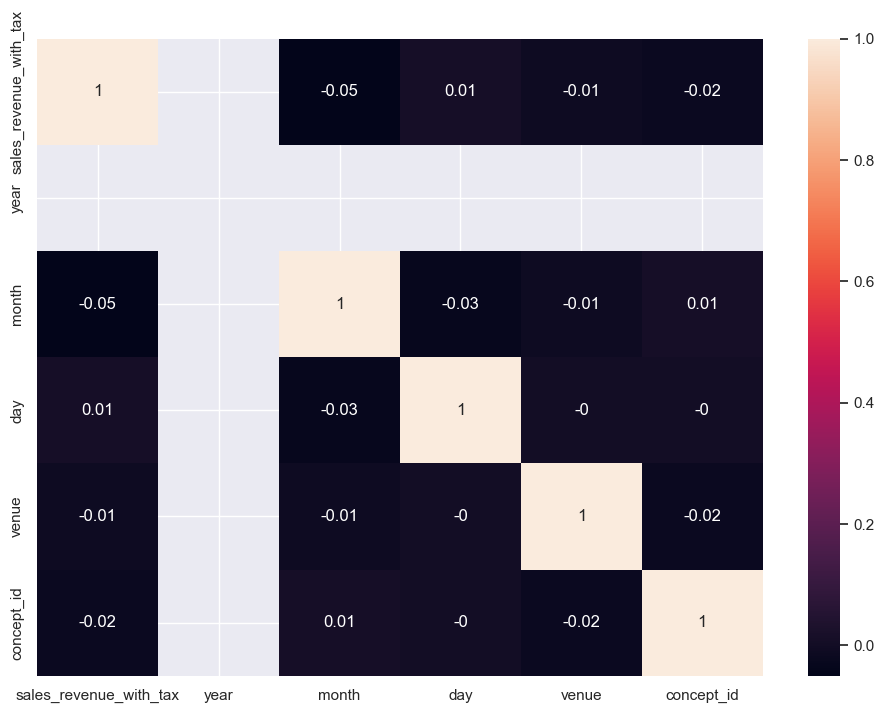

In [45]:
corr_matrix = q3_data.corr().round(2)
sns.set_theme(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data=corr_matrix, annot=True)

In [ ]:
x = q3_data.drop('sales_revenue_with_tax', axis=1)
y = q3_data.sales_revenue_with_tax



x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=5)
lr = linear_model.LinearRegression()
lr.fit(x_train1, y_train1)

g = x_test1.reset_index(drop=True).iloc[[0]]



[3760.20651665]


In [94]:
def predict(venue_id, date):
    venue = venues_dict[venue_id]
    concept = concepts_dict[venue_data.loc[venue_data['venue_xref_id'] == venue_id]['concept'].reset_index(drop=True)[0]]
    day = date.day
    month = date.month
    year = date.year
    pred = lr.predict(np.array([year, month, day, venue, concept]).reshape(1, -1))[0]

    print(f'Date: {date.isoformat()}')
    print(f'Predicted Sales: {pred}')



In [97]:
date = datetime.datetime.fromisoformat('2024-11-06')
test_ven = 'd5392e9b2bec5d2f44d2c45006adf978ad4b5cc87efae3db98f0f86e4715f219'

predict(test_ven, date)


Date: 2024-11-06T00:00:00
Predicted Sales: 3402.2043550169374


c:\Users\Aroor\OneDrive\Desktop\CPS521\CxC\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
